In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.0"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<div style="text-align:center;"><h1>Datasets: Real-World networks</h1></div>

<h2>Dependencies</h2>

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import sys
import powerlaw
import pandas as pd
import networkx as nx

In [3]:
%load_ext autoreload
%autoreload 2
sys.path.append('../../code')

from org.gesis.libs import io
from org.gesis.libs import viz
from org.gesis.libs.utils import printf
from org.gesis.libs.network import get_network_summary
from org.gesis.libs.network import get_nodes_metadata


<h2>Constants</h2>

In [4]:
DATASETS = ['aps','github','pokec','wikipedia'] #'twitter'
ROOT = '../../data/'
PLOTS = '../../plots/'
OUTPUT = "../../results-batch/"

<h2>Datasets' description</h2>

In [5]:
printf('start')
fn = os.path.join(OUTPUT, 'summary_datasets.csv')

2020-02-27 14:55:25	start


In [6]:
if os.path.exists(fn):
    df_summary = io.read_csv(fn)
    printf('loaded')
else:
    df_summary = None

    for dataset in DATASETS:
        printf('{}...'.format(dataset))
        fn = os.path.join(ROOT, dataset, '{}_attributed_network_anon.gpickle'.format(dataset))
        G = nx.read_gpickle(fn)
        row = get_network_summary(G)    
        del(G)

        if df_summary is None:
            df_summary = row.copy()
        else:
            df_summary = df_summary.append(row, ignore_index=True)

    df_summary = df_summary.round({'EMM': 3, 'EMm': 3, 'EmM':3, 'Emm':3, 
                                   'density':5, 'fm':2})
    printf('done')

2020-02-27 14:55:25	loaded


In [7]:
df_summary.round({'hMM':2, 'hmm':2,
                  'gammaM':2, 'gammam':2})

,dataset,N,cc,class,m,M,fm,E,Emm,EMM,...,EMm,density,gammaM,kminM,gammam,kminm,hMM,hmm,triadsratio,triadspdf
0,APS,1853,173,pacs,05.20.-y,05.30.-d,0.38,3638,0.294,0.650,...,0.029,0.00106,2.88,4.0,5.02,5.0,0.95,0.93,7.741234e-07,"[0.0, 0.2602935911206588, 0.0, 0.6942355889724..."
1,Github,296612,6965,gender,female,male,0.06,1723930,0.005,0.899,...,0.051,0.00002,2.85,60.0,2.66,21.0,0.55,0.61,2.551588e-10,"[0.00012062479001814398, 0.0006425589775966516..."
2,Pokec,1632636,1,gender,1,0,0.49,30622117,0.195,0.250,...,0.248,0.00001,4.51,131.0,3.85,109.0,0.51,0.38,2.853004e-11,"[0.043744452862550076, 0.0685444396945499, 0.0..."
3,Wikipedia,3159,66,gender,female,male,0.15,14890,0.030,0.785,...,0.078,0.00149,3.65,17.0,2.44,5.0,0.67,0.58,1.416910e-06,"[0.0009691331104327179, 0.0026166593981683385,..."


In [8]:
io.save_csv(df_summary, fn)

2020-02-27 14:55:25	../../results-batch/summary_datasets.csv saved!


True

<h2>Latex summary</h2>

In [9]:
df_latex_summary = df_summary.pivot_table(columns='dataset', aggfunc=lambda x: ' '.join(str(v) for v in x) )
columns = ['N','cc','class','M','m','fm','E','EMM','EMm','EMm','Emm','density']
df_latex_summary = df_latex_summary.reindex(columns)
df_latex_summary

dataset,APS,Github,Pokec,Wikipedia
N,1853,296612,1632636,3159
cc,173,6965,1,66
class,pacs,gender,gender,gender
M,05.30.-d,male,0,male
m,05.20.-y,female,1,female
fm,0.38,0.06,0.49,0.15
E,3638,1723930,30622117,14890
EMM,0.65,0.899,0.25,0.785
EMm,0.029,0.051,0.248,0.078
EMm,0.029,0.051,0.248,0.078


In [10]:
fn = os.path.join(OUTPUT, 'summary_datasets.tex')
df_latex_summary.to_latex(fn, float_format=lambda x: '%.5f' % x)
print('{} saved!'.format(fn))

../../results-batch/summary_datasets.tex saved!


<h2>Node attributes</h2>

In [11]:
printf('init')
df_metadata = None
for dataset in DATASETS:
    printf('=== {} ==='.format(dataset))
    fn = os.path.join(ROOT, dataset, 'nodes_metadata.csv')
    
    if os.path.exists(fn):
        df = io.read_csv(fn)
        printf('loaded!')
    else:
        fng = os.path.join(ROOT, dataset, '{}_attributed_network_anon.gpickle'.format(dataset))
        G = nx.read_gpickle(fng)
        printf('computing...')
        
        df = get_nodes_metadata(G, num_cores=10)    
        df.loc[:,'dataset'] = dataset
        del(G)

        io.save_csv(df, fn)        

    ### df_metadata from all datasets (append)
    if df_metadata is None:
        df_metadata = df.copy()
    else:
        df_metadata = df_metadata.append(df, ignore_index=True)
    
    del(df)    

2020-02-27 14:55:25	init
2020-02-27 14:55:25	=== aps ===
2020-02-27 14:55:25	loaded!
2020-02-27 14:55:25	=== github ===
2020-02-27 14:55:26	loaded!
2020-02-27 14:55:26	=== pokec ===
2020-02-27 14:55:27	loaded!
2020-02-27 14:55:27	=== wikipedia ===
2020-02-27 14:55:27	loaded!


In [12]:
df_metadata.head()

,node,minority,indegree,outdegree,pagerank,circle_of_trust,wtf,dataset
0,1,0,0,2,0.000230,0.0,0.0,aps
1,2,0,11,2,0.001268,14.0,17.0,aps
2,3,1,2,0,0.001534,10.0,0.0,aps
3,4,1,0,2,0.000230,0.0,0.0,aps
4,5,0,1,0,0.000591,2.0,0.0,aps


<h2>Degree Distributions</h2>

In [13]:
df_metadata_pivot = None

for dataset in DATASETS:
    tmp = df_metadata.query("dataset==@dataset").copy().sort_values('node')
    
    for metric in ['indegree','outdegree','pagerank']:
        tmpnew = pd.DataFrame({'dataset':dataset,
                               'node':tmp.node,
                               'minority':tmp.minority,
                               'metric':metric,
                               'value':tmp[metric]
                            })
        if df_metadata_pivot is None:
            df_metadata_pivot = tmpnew.copy()
        else:
            df_metadata_pivot = df_metadata_pivot.append(tmpnew, ignore_index=True)
    
    del(tmpnew)
    del(tmp)
    
df_metadata_pivot.head()    

,dataset,metric,minority,node,value
0,aps,indegree,0,1,0.0
1,aps,indegree,0,2,11.0
2,aps,indegree,1,3,2.0
3,aps,indegree,1,4,0.0
4,aps,indegree,0,5,1.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

../../plots/distributions.pdf saved!


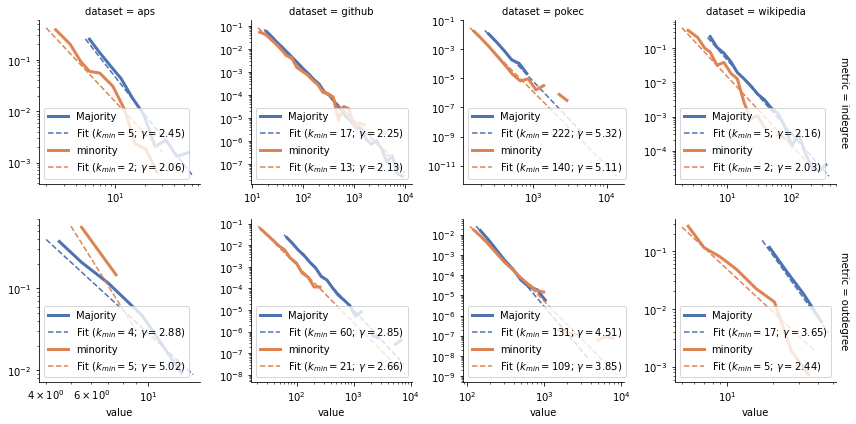

In [14]:
fn = os.path.join(PLOTS, 'distributions.pdf')
viz.plot_degree_distributions_groups(df_metadata_pivot, fn)

In [15]:
printf('done')

2020-02-27 15:06:49	done
